In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
df = pd.read_csv('../data/interim/preproc.csv', index_col=0)
df.head()

,key,project_id,creation_date,resolution_date,summary,description,type,lines_added,lines_removed,files_changed,text
0,EXEC-108,commons-exec,2018-09-18T11:15:58.000+0000,NaN,compatibility problem android adb,using apache exec execute following android ad...,Bug,0,0,0,compatibility problem android adb using apache...
1,EXEC-107,commons-exec,2018-07-04T12:09:47.000+0000,NaN,start independent process,hi would like start independent process either...,New Feature,0,0,0,start independent process hi would like start ...
2,EXEC-106,commons-exec,2018-03-06T11:32:51.000+0000,NaN,watchdog class could use volatile instead synch,look like watchdog class could use volatile bo...,Improvement,0,0,0,watchdog class could use volatile instead sync...
3,EXEC-105,commons-exec,2018-02-16T13:47:10.000+0000,NaN,small mistake documentation apache common exec,want apologize issue correctly formatted new i...,Wish,0,0,0,small mistake documentation apache common exec...
4,EXEC-104,commons-exec,2017-08-04T11:57:39.000+0000,NaN,test failure watchdog killed process,URL watchdog killed process process killed wat...,Bug,0,0,0,test failure watchdog killed process URL watch...


## Preparing data

In [3]:
data_words = [str(txt).split(" ") for txt in df['text']]

# LDA

In [ ]:
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
import pickle 
import pyLDAvis

## Term Frequency

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 3), (3, 3), (4, 1), (5, 2), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Now:', num_topics)
        # Build LDA model
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# https://radimrehurek.com/gensim/models/coherencemodel.html
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=3, limit=24, step=4)

Now: 3


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now: 7
Now: 11
Now: 15
Now: 19
Now: 23


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


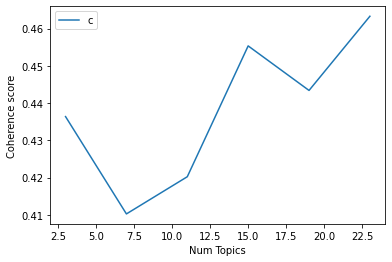

In [29]:
# Show graph
limit=40; start=2; step=6;
x = range(3, 24, 4)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.4364
Num Topics = 7  has Coherence Value of 0.4102
Num Topics = 11  has Coherence Value of 0.4202
Num Topics = 15  has Coherence Value of 0.4553
Num Topics = 19  has Coherence Value of 0.4434
Num Topics = 23  has Coherence Value of 0.4633


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
lda_model = model_list[np.argmax(coherence_values)]
num_topics = 23

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared, '.ldavis_prepared_'+ str(num_topics) +'.html')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [33]:
LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.005197 -0.083471       1        1  11.427466
11     0.027742 -0.014537       2        1   7.695512
1      0.099007 -0.092031       3        1   7.343585
12    -0.024412 -0.002522       4        1   7.048647
0     -0.027048 -0.028072       5        1   5.193625
22    -0.020187 -0.052266       6        1   5.159073
9      0.032912 -0.057145       7        1   4.961862
14     0.043705 -0.057930       8        1   4.876871
21    -0.110388  0.078181       9        1   4.361840
19     0.068880 -0.013668      10        1   4.340749
8     -0.026424  0.030256      11        1   4.103477
20     0.143509  0.129778      12        1   3.752099
4      0.034959  0.056552      13        1   3.384693
6     -0.063872  0.030739      14        1   3.288588
7     -0.029369 -0.014577      15        1   3.283505
3     -0.063098 -0.028169      16        1   3.275854
13    -0.031357 -0.013458      17        1   3.009440
16     0.001788  0.010547      18        1   2.883903
18    -0.061794  0.024160      19        1   2.741823
2     -0.053504  0.039013      20        1   2.335611
17    -0.048874  0.020739      21        1   2.184347
15     0.028844 -0.038132      22        1   2.140219
5      0.084176  0.076012      23        1   1.207210, topic_info=         Term          Freq         Total Category  logprob  loglift
54       file  57517.000000  57517.000000  Default  30.0000  30.0000
2030   number  30381.000000  30381.000000  Default  29.0000  29.0000
709      info  30355.000000  30355.000000  Default  28.0000  28.0000
82    support  28490.000000  28490.000000  Default  27.0000  27.0000
22       line  28255.000000  28255.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
928      type    259.370228  24771.297934  Topic23  -5.4787  -0.1423
364       get    223.207779  14126.316724  Topic23  -5.6289   0.2692
817      user    247.955986  25219.915788  Topic23  -5.5237  -0.2053
2913    query    217.717309  13296.476406  Topic23  -5.6538   0.3048
13      error    227.656239  36688.382344  Topic23  -5.6091  -0.6655

[1917 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
1434       1  0.086296      
1434       2  0.035546      
1434       3  0.061332      
1434       4  0.040682      
1434       5  0.063078      
...      ...       ...   ...
16343     22  0.010092     â
27833     11  0.926258     ä
21847      9  0.971625   січ
13845     21  0.960352  离开目录
13846     21  0.914812  进入目录

[12289 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 12, 2, 13, 1, 23, 10, 15, 22, 20, 9, 21, 5, 7, 8, 4, 14, 17, 19, 3, 18, 16, 6])

In [14]:
doc_topic = np.ones(len(corpus))
for i, document in enumerate(corpus):
    doc_topic[i] = int(np.argmax([x for _,x in lda_model.get_document_topics(document)]))+1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
doc_topic

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([6., 7., 8., ..., 9., 8., 8.])

In [16]:
lda_model.get_topic_terms(1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(54, 0.003330789),
 (1866, 0.003270719),
 (1434, 0.0027850072),
 (139, 0.0026682743),
 (1865, 0.0026072243),
 (335, 0.0025716529),
 (493, 0.002542322),
 (13, 0.0025010156),
 (127, 0.0024833265),
 (2236, 0.0024162852)]

In [17]:
lda_model.print_topic(1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'0.003*"file" + 0.003*"table" + 0.003*"" + 0.003*"test" + 0.003*"property" + 0.003*"service" + 0.003*"add" + 0.003*"error" + 0.002*"value" + 0.002*"upgrade"'

In [18]:
lda_model.print_topics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*"service" + 0.004*"" + 0.003*"file" + 0.003*"server" + 0.003*"upgrade" + 0.003*"user" + 0.003*"error" + 0.003*"update" + 0.002*"version" + 0.002*"test"'),
 (1,
  '0.003*"file" + 0.003*"table" + 0.003*"" + 0.003*"test" + 0.003*"property" + 0.003*"service" + 0.003*"add" + 0.003*"error" + 0.002*"value" + 0.002*"upgrade"'),
 (2,
  '0.005*"" + 0.003*"add" + 0.003*"support" + 0.003*"service" + 0.002*"server" + 0.002*"test" + 0.002*"upgrade" + 0.002*"file" + 0.002*"user" + 0.002*"table"'),
 (3,
  '0.006*"" + 0.003*"host" + 0.003*"test" + 0.003*"table" + 0.003*"service" + 0.003*"metric" + 0.003*"file" + 0.002*"add" + 0.002*"stack" + 0.002*"page"'),
 (4,
  '0.004*"host" + 0.004*"" + 0.003*"info" + 0.003*"server" + 0.003*"test" + 0.003*"file" + 0.003*"table" + 0.003*"add" + 0.003*"error" + 0.002*"service"'),
 (5,
  '0.005*"" + 0.004*"test" + 0.003*"file" + 0.003*"error" + 0.003*"version" + 0.003*"service" + 0.003*"table" + 0.002*"unknown" + 0.002*"config" + 0.002*"host"'),
 (6,
  '

In [19]:
lda_model.get_topics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.5385655e-03, 2.1974283e-06, 2.1974945e-06, ..., 2.1973756e-06,
        2.1973756e-06, 2.1973756e-06],
       [1.6155283e-03, 2.9526821e-06, 1.7120504e-06, ..., 1.7119575e-06,
        1.7119575e-06, 1.7119575e-06],
       [1.4869090e-03, 2.2056881e-06, 2.1982032e-06, ..., 2.1980961e-06,
        2.1980961e-06, 2.1980961e-06],
       ...,
       [1.4607168e-03, 2.3273483e-06, 2.3274138e-06, ..., 2.3272883e-06,
        2.3272883e-06, 2.3272883e-06],
       [1.5667976e-03, 1.6379980e-06, 1.6368433e-06, ..., 1.6403613e-06,
        1.6403613e-06, 1.6403613e-06],
       [1.6855744e-03, 1.3592817e-06, 1.3611194e-06, ..., 1.3628866e-06,
        1.3628866e-06, 1.3628866e-06]], dtype=float32)